In [1]:
import torch
import torchvision
import torchvision.transforms as T
from matplotlib import pyplot as plt
import numpy as np
transform=T.Compose([T.ToTensor(), T.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

traindata=torchvision.datasets.CIFAR10(root='./data', train=True, download=False, transform=transform)
trainloader=torch.utils.data.DataLoader(traindata, batch_size=4, shuffle=True)

testdata=torchvision.datasets.CIFAR10(root='./data', train=False, download=False, transform=transform)
testloader=torch.utils.data.DataLoader(testdata, batch_size=4, shuffle=True)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imgshow(image):
    image=image*0.5 + 0.5
    img_np = image.numpy()
    plt.imsave('sample.jpg', np.transpose(img_np,(1,2,0)))

image,labels=iter(trainloader).next()
imgshow(torchvision.utils.make_grid(image))
print( [classes[labels[j]] for j in range(4)])

import torch.nn as nn
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super(Network,self).__init__()
        self.cnv1=nn.Conv2d(3,6,5)
        self.pool=nn.MaxPool2d(2,2)
        self.cnv2=nn.Conv2d(6,16,5)
        self.fc1=nn.Linear(400,120)
        self.fc2=nn.Linear(120,84)
        self.fc3=nn.Linear(84,10)

    def forward(self,x):
        x = self.pool(F.relu(self.cnv1(x)))
        x = self.pool(F.relu(self.cnv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
        

net=Network()
import torch.optim as optim
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(net.parameters() , lr=0.001, momentum=0.9)



['horse', 'car', 'cat', 'cat']


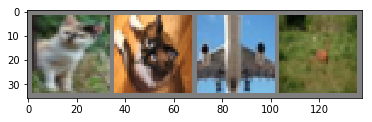

In [2]:
from matplotlib import pyplot as plt
def imageshow(im):
    im_np= im.numpy()
    im_np= np.transpose(im_np, (1,2,0))
    im_np=im_np*0.5 + 0.5 
    plt.imshow(im_np)
images,labels = iter(trainloader).next()
images=torchvision.utils.make_grid(images)
imageshow(images)
#images

In [77]:
for epoch in range(2):
    running_loss=0
    for i,data in enumerate(trainloader):
        images,labels=data
        optimizer.zero_grad()
        output = net(images)
        loss = criterion(output,labels)
        loss.backward()
        optimizer.step()
        

In [78]:

correct=0
total=0
classes_ref=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
classes_total=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
with torch.no_grad():
    for data in testloader:
        image,labels=data
        output_test=net(image)
        _, predictions = torch.max(output_test,1)
        total+=labels.size(0)
        correct+=(predictions==labels).sum().item()
        for i in range(4):
            if predictions[i]==labels[i]:
                classes_ref[np.int(predictions[i].numpy())]+=1
            classes_total[labels[i]]+=1

    print('Accuracy={}%'.format(100*correct/total))







Accuracy=53.38%


In [79]:
for i in range (10):
    print('Accuracy of {} = {}'.format(classes[i],classes_ref[i]/10))

Accuracy of plane = 59.8
Accuracy of car = 69.4
Accuracy of bird = 22.9
Accuracy of cat = 29.7
Accuracy of deer = 55.4
Accuracy of dog = 42.3
Accuracy of frog = 56.1
Accuracy of horse = 79.4
Accuracy of ship = 68.7
Accuracy of truck = 50.1
